# Importing the libraries

In [ ]:
!pip install scikit-optimize
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from scipy.stats import randint
import skopt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import torch
import torch.nn as nn
import torch.nn.functional as f
import torch.optim as optim
from torch.utils.data import DataLoader,random_split,TensorDataset
import os
import re
import pandas as pd
import librosa
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report
from scipy.fft import fft


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 10.6 MB/s eta 0:00:00


# Importing the dataset

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arvindsharma126","key":"03e2df86565eb6c7ec809398ad7ff37c"}'}

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio


100% 429M/429M [00:12<00:00, 40.3MB/s]
100% 429M/429M [00:12<00:00, 37.4MB/s]


In [ ]:
!unzip ravdess-emotional-speech-audio.zip -d ravdess-emotional-speech-audio

Archive:  ravdess-emotional-speech-audio.zip
  inflating: ravdess-emotional-speech-audio/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: ravdess-emotional-speech-audio/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: ravdess-emotional-speech-audio/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: ravdess-emotional-speech-audio/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: ravdess-emotional-speech-audio/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: ravdess-emotional-speech-audio/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: ravdess-emotional-speech-audio/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: ravdess-emotional-speech-audio/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: ravdess-emotional-speech-audio/Actor_01/03-01-02-02-01-01-01.wav  
  inflating: ravdess-emotional-speech-audio/Actor_01/03-01-02-02-01-02-01.wav  
  inflating: ravdess-emotional-speech-audio/Actor_01/03-01-02-02-02-01-01.wav  
  inflating: ravdess-emotional-speech-audio/Actor_01/03-01-02-02-02-02-01.w

# Converting the audio files to a csv file

In [ ]:
path = "/content/ravdess-emotional-speech-audio"
final = np.zeros((1440,))
k = 0
for i in range(1,25):
  os.chdir(path+f"/Actor_{i:02}")
  for f in os.listdir():
    y,sr = librosa.load(f,duration=2.9)
    final[k] = len(y)
    k+=1
    # y = librosa.feature.mfcc(y = y,sr = sr,n_mfcc = 10000)
    # final = np.vstack([final,y.reshape((1,-1))])
np.std(final)

In [ ]:
final

array([63945., 63945., 63945., ..., 63945., 63945., 63945.])

In [ ]:
df = pd.DataFrame(columns=["Modality","Vocal channel","Emotion","Emotional intensity","Statement","Repetition","Actor"])
j = 0
final = []
audio = np.zeros((63945,))
path = "/content/ravdess-emotional-speech-audio"
for i in range(1,25):
  os.chdir(path+f"/Actor_{i:02}")
  for f in os.listdir():
    data = f.split(".")[0]
    data = data.split("-")
    final.append(data)
    y,sr = librosa.load(f,duration=2.9)
    audio = np.vstack([audio,y.reshape((1,-1))])
audio = audio[1:,:]

In [ ]:
final

[['03', '01', '05', '02', '02', '01', '01'],
 ['03', '01', '04', '02', '02', '01', '01'],
 ['03', '01', '01', '01', '02', '02', '01'],
 ['03', '01', '02', '02', '02', '01', '01'],
 ['03', '01', '04', '02', '02', '02', '01'],
 ['03', '01', '03', '02', '01', '02', '01'],
 ['03', '01', '08', '02', '01', '01', '01'],
 ['03', '01', '06', '01', '01', '01', '01'],
 ['03', '01', '03', '02', '02', '01', '01'],
 ['03', '01', '07', '02', '02', '02', '01'],
 ['03', '01', '08', '01', '02', '02', '01'],
 ['03', '01', '08', '02', '02', '01', '01'],
 ['03', '01', '07', '01', '01', '02', '01'],
 ['03', '01', '03', '02', '02', '02', '01'],
 ['03', '01', '04', '01', '01', '01', '01'],
 ['03', '01', '01', '01', '02', '01', '01'],
 ['03', '01', '05', '02', '02', '02', '01'],
 ['03', '01', '06', '01', '01', '02', '01'],
 ['03', '01', '06', '02', '01', '02', '01'],
 ['03', '01', '04', '01', '01', '02', '01'],
 ['03', '01', '07', '02', '01', '01', '01'],
 ['03', '01', '04', '01', '02', '02', '01'],
 ['03', '0

In [ ]:
len(final)

1440

In [ ]:
final = np.array(final).astype(int)

In [ ]:
final

array([[ 3,  1,  5, ...,  2,  1,  1],
       [ 3,  1,  4, ...,  2,  1,  1],
       [ 3,  1,  1, ...,  2,  2,  1],
       ...,
       [ 3,  1,  2, ...,  1,  2, 24],
       [ 3,  1,  4, ...,  1,  2, 24],
       [ 3,  1,  6, ...,  1,  1, 24]])

In [ ]:
dataset = pd.DataFrame(final,columns=["Modality","Vocal channel","Emotion","Emotional intensity","Statement","Repetition","Actor"])

In [ ]:
dataset

,Modality,Vocal channel,Emotion,Emotional intensity,Statement,Repetition,Actor
0,3,1,5,2,2,1,1
1,3,1,4,2,2,1,1
2,3,1,1,1,2,2,1
3,3,1,2,2,2,1,1
4,3,1,4,2,2,2,1
...,...,...,...,...,...,...,...
1435,3,1,8,1,1,2,24
1436,3,1,5,1,1,2,24
1437,3,1,2,2,1,2,24
1438,3,1,4,1,1,2,24


In [ ]:
audio = pd.DataFrame(audio)

In [ ]:
audio

,0,1,2,3,4,5,6,7,8,9,...,63935,63936,63937,63938,63939,63940,63941,63942,63943,63944
0,2.329042e-04,1.441041e-03,3.753820e-04,-9.898245e-04,-7.679415e-04,-4.599194e-04,-4.708872e-05,4.473904e-04,4.904005e-04,1.692135e-04,...,4.532097e-02,0.050078,0.045070,3.029229e-02,3.539371e-02,5.646525e-02,5.664071e-02,5.869206e-02,5.510687e-02,6.350432e-02
1,1.018356e-08,-1.005014e-08,9.524251e-09,-8.538231e-09,7.048115e-09,-4.995490e-09,2.328892e-09,9.916166e-10,-4.992537e-09,9.683954e-09,...,3.179810e-05,0.000044,0.000026,-1.672583e-06,9.198144e-06,2.301180e-05,-3.754093e-06,2.038091e-06,-1.250351e-06,7.715186e-07
2,2.278331e-05,3.115162e-05,4.793048e-06,-2.723841e-06,3.141930e-06,-4.905643e-06,3.262787e-05,6.475767e-05,3.161153e-05,3.185779e-05,...,3.252479e-06,0.000013,-0.000002,3.341737e-07,5.308339e-07,1.392216e-05,-4.699850e-07,-2.686204e-08,2.657069e-07,-4.201772e-07
3,2.429188e-05,2.923215e-05,8.048310e-06,2.269307e-05,4.088906e-05,5.115393e-05,4.717479e-05,2.486637e-05,4.857911e-05,4.697332e-05,...,8.280606e-03,0.008378,0.008179,7.974692e-03,7.836316e-03,7.985077e-03,8.453447e-03,8.543141e-03,7.968901e-03,7.787952e-03
4,1.813627e-13,-1.941189e-13,-1.676032e-13,-3.610815e-14,8.697801e-14,1.488941e-13,3.876199e-14,1.113698e-13,3.546329e-13,-1.602816e-13,...,-5.929249e-06,0.000005,-0.000005,9.120397e-06,2.205470e-05,5.102658e-06,2.106591e-05,7.540939e-08,6.271493e-06,1.096370e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-3.476922e-07,-0.000001,0.000004,3.806172e-05,3.835830e-07,6.750817e-06,1.863219e-05,1.346969e-05,5.569830e-06,-3.534751e-06
1436,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-2.550414e-06,0.000002,-0.000002,1.629342e-06,-1.235343e-06,8.224735e-07,-5.586875e-07,2.645753e-06,5.533508e-05,4.465951e-05
1437,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.530484e-04,0.000148,-0.000035,-2.018864e-04,-2.044283e-04,-1.777444e-04,-4.314623e-05,1.452080e-04,3.828391e-04,7.722454e-04
1438,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,8.580230e-04,0.000592,0.000535,3.330597e-04,1.518707e-04,1.039850e-04,7.744366e-05,1.735599e-05,-1.867246e-06,-5.283646e-06


In [ ]:
dataset = pd.concat([dataset,audio],axis = 1)

In [ ]:
dataset

,Modality,Vocal channel,Emotion,Emotional intensity,Statement,Repetition,Actor,0,1,2,...,63935,63936,63937,63938,63939,63940,63941,63942,63943,63944
0,3,1,5,2,2,1,1,2.329042e-04,1.441041e-03,3.753820e-04,...,4.532097e-02,0.050078,0.045070,3.029229e-02,3.539371e-02,5.646525e-02,5.664071e-02,5.869206e-02,5.510687e-02,6.350432e-02
1,3,1,4,2,2,1,1,1.018356e-08,-1.005014e-08,9.524251e-09,...,3.179810e-05,0.000044,0.000026,-1.672583e-06,9.198144e-06,2.301180e-05,-3.754093e-06,2.038091e-06,-1.250351e-06,7.715186e-07
2,3,1,1,1,2,2,1,2.278331e-05,3.115162e-05,4.793048e-06,...,3.252479e-06,0.000013,-0.000002,3.341737e-07,5.308339e-07,1.392216e-05,-4.699850e-07,-2.686204e-08,2.657069e-07,-4.201772e-07
3,3,1,2,2,2,1,1,2.429188e-05,2.923215e-05,8.048310e-06,...,8.280606e-03,0.008378,0.008179,7.974692e-03,7.836316e-03,7.985077e-03,8.453447e-03,8.543141e-03,7.968901e-03,7.787952e-03
4,3,1,4,2,2,2,1,1.813627e-13,-1.941189e-13,-1.676032e-13,...,-5.929249e-06,0.000005,-0.000005,9.120397e-06,2.205470e-05,5.102658e-06,2.106591e-05,7.540939e-08,6.271493e-06,1.096370e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,3,1,8,1,1,2,24,0.000000e+00,0.000000e+00,0.000000e+00,...,-3.476922e-07,-0.000001,0.000004,3.806172e-05,3.835830e-07,6.750817e-06,1.863219e-05,1.346969e-05,5.569830e-06,-3.534751e-06
1436,3,1,5,1,1,2,24,0.000000e+00,0.000000e+00,0.000000e+00,...,-2.550414e-06,0.000002,-0.000002,1.629342e-06,-1.235343e-06,8.224735e-07,-5.586875e-07,2.645753e-06,5.533508e-05,4.465951e-05
1437,3,1,2,2,1,2,24,0.000000e+00,0.000000e+00,0.000000e+00,...,4.530484e-04,0.000148,-0.000035,-2.018864e-04,-2.044283e-04,-1.777444e-04,-4.314623e-05,1.452080e-04,3.828391e-04,7.722454e-04
1438,3,1,4,1,1,2,24,0.000000e+00,0.000000e+00,0.000000e+00,...,8.580230e-04,0.000592,0.000535,3.330597e-04,1.518707e-04,1.039850e-04,7.744366e-05,1.735599e-05,-1.867246e-06,-5.283646e-06


In [ ]:
dataset.to_csv("/content/drive/MyDrive/PRML_Major_Project/audio_dataset.csv",index = False)

In [ ]:
dataset.iloc[:,7:] = np.abs(fft(dataset.iloc[:,7:],axis = 1))

In [ ]:
dataset.to_csv("/content/drive/MyDrive/PRML_Major_Project/audio_fft_dataset.csv")

In [ ]:
data = dataset.iloc[:,7:].values
mel = []
l = len(data)
for i in range(l):
  m = librosa.feature.melspectrogram(y = data[i,:])
  mel.append(m.reshape((1,-1))[0])
m = np.array(mel)

In [ ]:
m = pd.DataFrame(m)
dataset = pd.concat([dataset.iloc[:,0:7],m],axis = 1)

In [ ]:
dataset.to_csv("/content/drive/MyDrive/PRML_Major_Project/audio_mel_dataset.csv",index = False)

# Loading the pre-processed Fourier Transform and Mel Spectogram Dataset

In [ ]:
data1=pd.read_csv("/content/drive/MyDrive/PRML_Major_Project/audio_fft_dataset.csv")
data2=pd.read_csv("/content/drive/MyDrive/PRML_Major_Project/audio_mel_dataset.csv")

In [ ]:
data1.drop(columns=["Unnamed: 0"],inplace=True)

In [ ]:
data1

,Modality,Vocal channel,Emotion,Emotional intensity,Statement,Repetition,Actor,0,1,2,...,63935,63936,63937,63938,63939,63940,63941,63942,63943,63944
0,3,1,5,2,2,1,1,0.562838,0.524753,0.407262,...,0.356059,0.279785,0.296763,0.210512,0.331878,0.300090,0.318311,0.209626,0.407262,0.524753
1,3,1,4,2,2,1,1,0.044707,0.018661,0.015253,...,0.007676,0.006029,0.004431,0.020777,0.026970,0.018854,0.006725,0.011850,0.015253,0.018661
2,3,1,1,1,2,2,1,0.065975,0.058365,0.024077,...,0.032877,0.041382,0.016992,0.031579,0.035822,0.024165,0.023249,0.021512,0.024077,0.058365
3,3,1,2,2,2,1,1,0.019496,0.071197,0.066295,...,0.030344,0.067316,0.020739,0.035819,0.065218,0.026406,0.055942,0.050371,0.066295,0.071197
4,3,1,4,2,2,2,1,0.065471,0.036018,0.044080,...,0.012859,0.019099,0.006354,0.018731,0.023008,0.013048,0.019262,0.009203,0.044080,0.036018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,3,1,8,1,1,2,24,0.009685,0.021843,0.005730,...,0.006263,0.009038,0.011431,0.007916,0.042234,0.043470,0.014524,0.016566,0.005730,0.021843
1436,3,1,5,1,1,2,24,0.001113,0.006725,0.013667,...,0.031690,0.049714,0.025524,0.032055,0.029004,0.035755,0.030565,0.017503,0.013667,0.006725
1437,3,1,2,2,1,2,24,0.196957,0.110510,0.010991,...,0.058543,0.031835,0.085497,0.108549,0.029150,0.055502,0.083451,0.081203,0.010991,0.110510
1438,3,1,4,1,1,2,24,0.080306,0.058616,0.017256,...,0.066964,0.085966,0.049558,0.047485,0.017968,0.039558,0.026743,0.008940,0.017256,0.058616


In [ ]:
data2

,Modality,Vocal channel,Emotion,Emotional intensity,Statement,Repetition,Actor,0,1,2,...,15990,15991,15992,15993,15994,15995,15996,15997,15998,15999
0,3,1,5,2,2,1,1,7.569644e-07,5.010802e-06,8.384924e-06,...,5.499699e-05,5.885491e-06,1.657120e-05,7.602131e-05,6.069553e-05,2.774049e-05,1.739454e-05,3.164505e-05,3.757783e-05,7.998535e-05
1,3,1,4,2,2,1,1,2.794822e-10,1.450041e-10,1.175133e-10,...,9.339636e-10,1.220944e-09,3.162984e-09,2.801177e-09,1.114704e-09,4.183812e-10,3.350986e-10,3.824072e-10,3.206519e-10,2.361991e-10
2,3,1,1,1,2,2,1,1.332402e-07,1.478175e-07,1.084568e-07,...,1.416472e-10,7.174033e-11,1.259040e-10,1.607572e-10,3.343664e-11,5.016731e-11,4.086213e-11,3.167913e-11,1.258924e-10,2.130951e-10
3,3,1,2,2,2,1,1,1.523058e-06,1.167175e-06,2.473346e-07,...,3.866556e-08,9.828029e-08,1.197246e-07,8.062022e-08,3.255798e-08,2.372752e-09,6.229968e-09,3.475527e-08,3.888261e-08,5.073903e-07
4,3,1,4,2,2,2,1,1.922096e-10,3.086805e-10,1.442073e-10,...,6.283513e-09,3.751002e-09,1.515500e-09,1.571249e-09,1.424604e-09,1.195403e-09,5.786857e-10,5.123155e-10,4.680149e-10,3.469635e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,3,1,8,1,1,2,24,0.000000e+00,0.000000e+00,0.000000e+00,...,9.985296e-10,4.968911e-10,3.221174e-10,3.396013e-10,3.091778e-10,3.297025e-10,4.210789e-10,4.688974e-10,7.026459e-10,5.663512e-10
1436,3,1,5,1,1,2,24,0.000000e+00,0.000000e+00,0.000000e+00,...,6.965746e-08,6.391710e-08,5.344007e-08,5.219970e-08,1.727351e-08,7.570125e-09,3.529409e-09,1.575603e-09,1.517090e-09,1.485708e-09
1437,3,1,2,2,1,2,24,0.000000e+00,0.000000e+00,0.000000e+00,...,2.448344e-08,8.441065e-09,8.191249e-08,2.261750e-07,1.162307e-07,5.961151e-08,5.394006e-08,5.558606e-08,3.873275e-08,4.627699e-08
1438,3,1,4,1,1,2,24,0.000000e+00,0.000000e+00,0.000000e+00,...,6.350594e-08,1.018883e-07,1.052788e-07,5.846529e-08,3.531843e-08,2.501399e-08,2.186149e-08,2.132620e-08,1.741378e-08,1.488148e-08


In [ ]:
np.sum(data1.isna())

Modality               0
Vocal channel          0
Emotion                0
Emotional intensity    0
Statement              0
                      ..
63940                  0
63941                  0
63942                  0
63943                  0
63944                  0
Length: 63952, dtype: int64

In [ ]:
np.sum(data2.isna())

Modality               0
Vocal channel          0
Emotion                0
Emotional intensity    0
Statement              0
                      ..
15995                  0
15996                  0
15997                  0
15998                  0
15999                  0
Length: 16007, dtype: int64

In [ ]:
X1 = data1.drop(columns=["Emotion"])
y1 = data1["Emotion"]
X2 = data2.drop(columns=["Emotion"])
y2 = data2["Emotion"]

# Splitting the Dataset

In [ ]:
#Splitting of dataset
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.2)
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2,test_size=0.2)

In [ ]:
X_test1.shape

(288, 63951)

# Fit and predict using Gaussian Naive Bayes

In [ ]:
# fit and predict using Gaussian Naive Bayes
clf = GaussianNB()
clf.fit(X_train1,y_train1)
print(classification_report(y_test1,clf.predict(X_test1)))
accuracy_score(y_test1,clf.predict(X_test1))

              precision    recall  f1-score   support

           1       0.15      0.18      0.16        22
           2       0.38      0.77      0.51        39
           3       0.26      0.19      0.22        31
           4       0.17      0.23      0.19        40
           5       0.55      0.50      0.52        34
           6       0.33      0.14      0.20        49
           7       0.41      0.20      0.27        35
           8       0.36      0.34      0.35        38

    accuracy                           0.32       288
   macro avg       0.33      0.32      0.30       288
weighted avg       0.33      0.32      0.31       288



0.3229166666666667

In [ ]:
# fit and predict using Gaussian Naive Bayes
clf = GaussianNB()
clf.fit(X_train2,y_train2)
print(classification_report(y_test2,clf.predict(X_test2)))
accuracy_score(y_test2,clf.predict(X_test2))

              precision    recall  f1-score   support

           1       0.32      0.62      0.43        16
           2       0.46      0.78      0.58        37
           3       0.18      0.07      0.10        42
           4       0.23      0.21      0.22        33
           5       0.44      0.39      0.41        36
           6       0.19      0.14      0.16        35
           7       0.56      0.33      0.42        42
           8       0.34      0.45      0.39        47

    accuracy                           0.36       288
   macro avg       0.34      0.38      0.34       288
weighted avg       0.34      0.36      0.33       288



0.3576388888888889

# Hyper-parameter tuning of Gaussian Naive Bayes upon var smoothing

Trainining accuracy,Testing accuracy
0.2517361111111111 0.2222222222222222
0.3107638888888889 0.2951388888888889
0.3333333333333333 0.3229166666666667
0.3315972222222222 0.3229166666666667
0.3315972222222222 0.3229166666666667
0.3324652777777778 0.3229166666666667
0.3324652777777778 0.3229166666666667
0.3324652777777778 0.3229166666666667
0.3324652777777778 0.3229166666666667
0.3333333333333333 0.3229166666666667


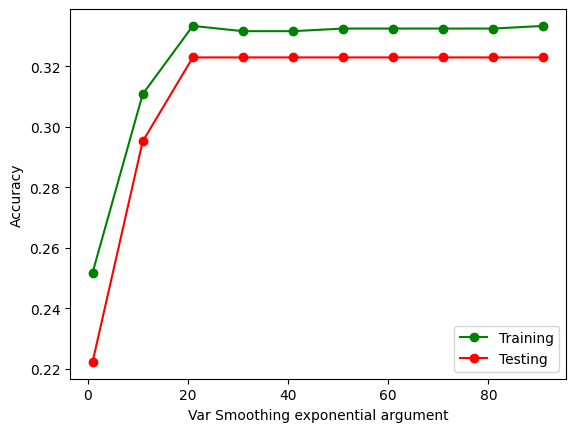

In [ ]:
var_smoothing=[math.exp(-i) for i in range(1,100,10)]
train_acc=[]
test_acc=[]
print("Trainining accuracy,Testing accuracy")
for i in var_smoothing:
  clf = GaussianNB(var_smoothing=i)
  clf.fit(X_train1,y_train1)
  train_acc.append(accuracy_score(y_train1,clf.predict(X_train1)))
  test_acc.append(accuracy_score(y_test1,clf.predict(X_test1)))
  print(accuracy_score(y_train1,clf.predict(X_train1)),accuracy_score(y_test1,clf.predict(X_test1)))

#Plot the graph
plt.plot([i for i in range(1,100,10)],train_acc,color="green",marker="o")
plt.plot([i for i in range(1,100,10)],test_acc,color="red",marker="o")
plt.xlabel("Var Smoothing exponential argument")
plt.ylabel("Accuracy")
plt.legend(["Training","Testing"])
plt.show()

Trainining accuracy,Testing accuracy
0.1623263888888889 0.13541666666666666
0.4244791666666667 0.23958333333333334
0.6241319444444444 0.3576388888888889
0.6267361111111112 0.3368055555555556
0.6180555555555556 0.3506944444444444
0.6171875 0.3472222222222222
0.6171875 0.3472222222222222
0.6171875 0.3472222222222222
0.6171875 0.3472222222222222
0.6171875 0.3472222222222222


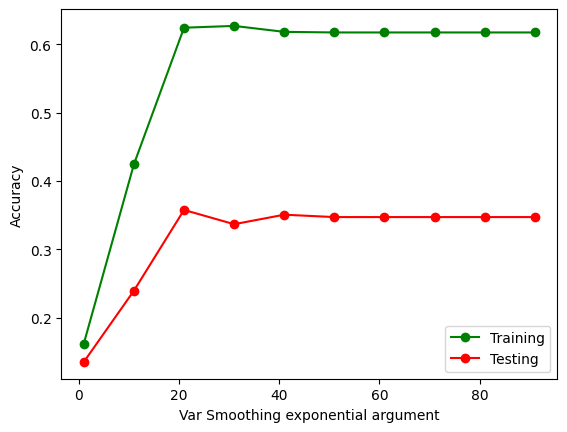

In [ ]:
var_smoothing = [math.exp(-i) for i in range(1, 100, 10)]
train_acc = []
test_acc = []

print("Trainining accuracy,Testing accuracy")
for i in var_smoothing:
    # Create Gaussian Naive Bayes classifier with the current var_smoothing value
    clf = GaussianNB(var_smoothing=i)
    
    # Fit the classifier to the training data
    clf.fit(X_train2, y_train2)
    
    # Calculate and store the training accuracy
    train_acc.append(accuracy_score(y_train2, clf.predict(X_train2)))
    
    # Calculate and store the testing accuracy
    test_acc.append(accuracy_score(y_test2, clf.predict(X_test2)))
    
    # Print the training and testing accuracy for the current var_smoothing value
    print(accuracy_score(y_train2, clf.predict(X_train2)), accuracy_score(y_test2, clf.predict(X_test2)))

# Plotting the training and testing accuracy
plt.plot([i for i in range(1, 100, 10)], train_acc, color="green", marker="o")
plt.plot([i for i in range(1, 100, 10)], test_acc, color="red", marker="o")
plt.xlabel("Var Smoothing exponential argument")
plt.ylabel("Accuracy")
plt.legend(["Training", "Testing"])
plt.show()

In [ ]:
var_smoothing

[0.36787944117144233,
 1.670170079024566e-05,
 7.582560427911907e-10,
 3.442477108469977e-14,
 1.5628821893349888e-18,
 7.095474162284704e-23,
 3.221340285992516e-27,
 1.462486227251231e-31,
 6.639677199580735e-36,
 3.0144087850653746e-40]

# Hyper-parameter tuning of Random Forest: Default model, Randomized Search CV & Key Parameters, Bayes Search CV, Ensemble Models upon Fourier Transform Dataset


In [ ]:
# Start with default parameters
default_model = RandomForestClassifier()
default_model.fit(X_train1, y_train1)
default_accuracy = default_model.score(X_test1, y_test1)
print("Default model accuracy:", default_accuracy)

Default model accuracy: 0.4201388888888889


In [ ]:
default_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_dist = {
    'n_estimators': randint(10, 100),
    'max_depth': [None] + list(range(5, 20)),
    'max_features': ['log2', 'sqrt'],
}

In [ ]:
# Use random search

random_search_model = RandomForestClassifier()
random_search = RandomizedSearchCV(random_search_model, param_distributions=param_dist, n_iter=10)
random_search.fit(X_train1, y_train1)
random_search_accuracy = random_search.best_score_
best_params = random_search.best_params_
print("Random search best accuracy:", random_search_accuracy)
print("Random search best parameters:", best_params)

# Focus on key parameters
key_params_model = RandomForestClassifier(n_estimators=100, max_depth=None, max_features='sqrt')
key_params_model.fit(X_train1, y_train1)
key_params_accuracy = key_params_model.score(X_test1, y_test1)
print("Key parameters model accuracy:", key_params_accuracy)

Random search best accuracy: 0.4002108036890646
Random search best parameters: {'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 97}
Key parameters model accuracy: 0.4548611111111111


In [ ]:
random_search

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15, 16,
                                                      17, 18, 19],
                                        'max_features': ['log2', 'sqrt'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ff620ce1540>})

In [ ]:
key_params_model

RandomForestClassifier()

In [ ]:
random_search_accuracy

0.4002108036890646

In [ ]:
key_params_accuracy

0.4548611111111111

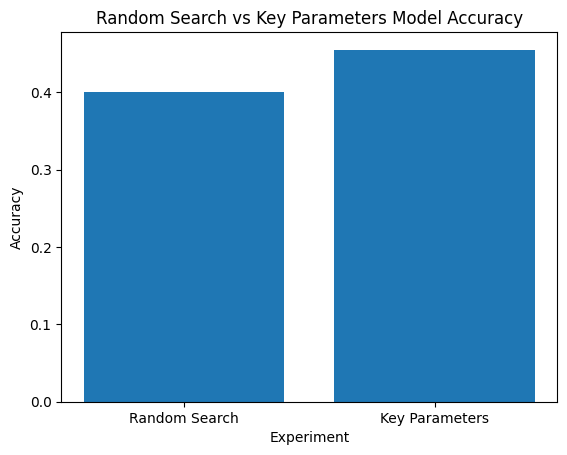

In [ ]:
# Experiment results
search_accuracy = [random_search_accuracy, key_params_accuracy]
labels = ['Random Search', 'Key Parameters']

# Plotting the results
plt.bar(labels, search_accuracy)
plt.xlabel('Experiment')
plt.ylabel('Accuracy')
plt.title('Random Search vs Key Parameters Model Accuracy')
plt.show()


In [ ]:
random_search_accuracy

0.4002108036890646

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV

# Define the parameter search space
param_space = {
    'n_estimators': (10, 100),
    'max_depth': (5, 20),
    'max_features': ['sqrt', 'log2'],
}

# Create a RandomForestClassifier model
model = RandomForestClassifier()

# Perform Bayesian optimization with cross-validation
bayes_search = BayesSearchCV(model, param_space, n_iter=10, cv=5)
bayes_search.fit(X1, y1)

# Get the best model and its accuracy
best_model = bayes_search.best_estimator_
best_accuracy = bayes_search.best_score_

print("Best accuracy:", best_accuracy)
print("Best parameters:", best_model.get_params())


Best accuracy: 0.38749999999999996
Best parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 14, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 83, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


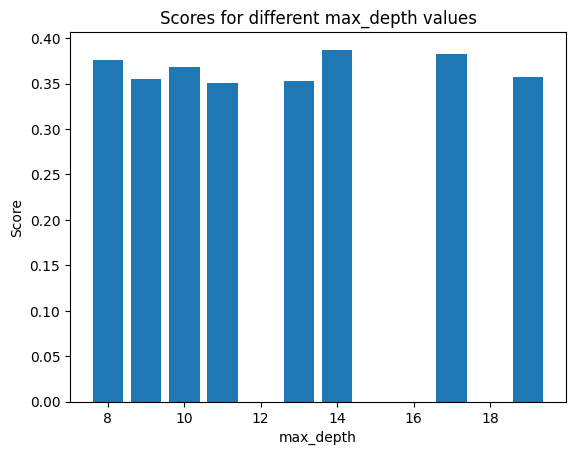

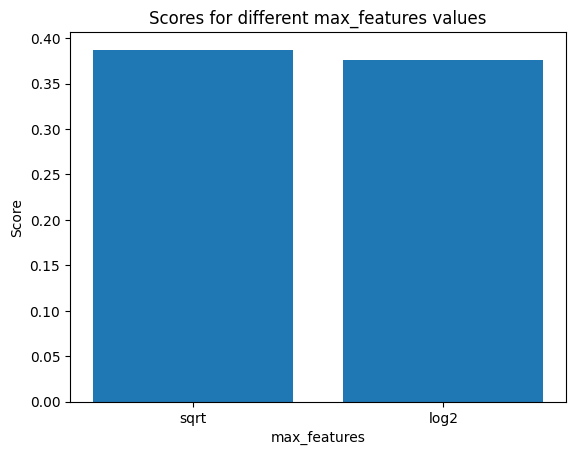

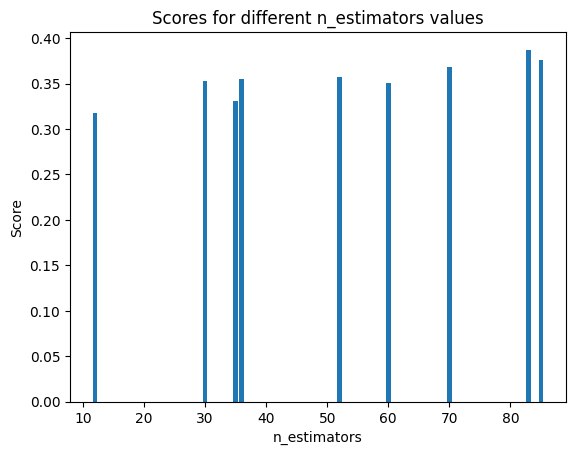

In [ ]:
# Get all scores and corresponding hyperparameters
all_scores = bayes_search.cv_results_['mean_test_score']
all_params = bayes_search.cv_results_['params']

# Extract hyperparameter values
n_estimators = [params['n_estimators'] for params in all_params]
max_depth = [params['max_depth'] for params in all_params]
max_features = [params['max_features'] for params in all_params]

# Plot for max_depth
plt.bar(max_depth, all_scores)
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Scores for different max_depth values')
plt.show()

# Plot for max_features
plt.bar(max_features, all_scores)
plt.xlabel('max_features')
plt.ylabel('Score')
plt.title('Scores for different max_features values')
plt.show()

# Plot for n_estimators
plt.bar(n_estimators, all_scores)
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.title('Scores for different n_estimators values')
plt.show()

In [ ]:
bayes_search

BayesSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=10,
              search_spaces={'max_depth': (5, 20),
                             'max_features': ['sqrt', 'log2'],
                             'n_estimators': (10, 100)})

In [ ]:
bayes_search.best_estimator_

RandomForestClassifier(max_depth=14, n_estimators=83)

In [ ]:
bayes_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 14,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 83,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Ensemble multiple models
ensemble_model_1 = RandomForestClassifier(n_estimators=100, max_depth=None, max_features='sqrt')
ensemble_model_2 = RandomForestClassifier(n_estimators=50, max_depth=10, max_features='sqrt')
ensemble_model_3 = RandomForestClassifier(n_estimators=150, max_depth=15, max_features='sqrt')

ensemble_models = [ensemble_model_1, ensemble_model_2, ensemble_model_3]
ensemble_scores = []

for model in ensemble_models:
    scores = cross_val_score(model, X1, y1, cv=5)
    ensemble_scores.append(scores.mean())

best_ensemble_model = ensemble_models[ensemble_scores.index(max(ensemble_scores))]
print("Best ensemble model accuracy:", max(ensemble_scores))

Best ensemble model accuracy: 0.4020833333333333


In [ ]:
ensemble_scores

[0.3826388888888889, 0.3861111111111112, 0.4020833333333333]

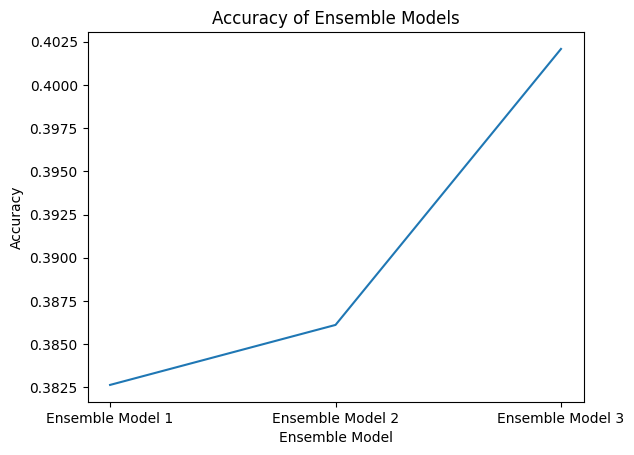

In [ ]:
# Create bar plots
ensemble_labels = ['Ensemble Model 1', 'Ensemble Model 2', 'Ensemble Model 3']

plt.plot(ensemble_labels, ensemble_scores)
plt.xlabel('Ensemble Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Ensemble Models')
plt.show()

# Plotting the comparison bar plot upon Fourier Transform Dataset

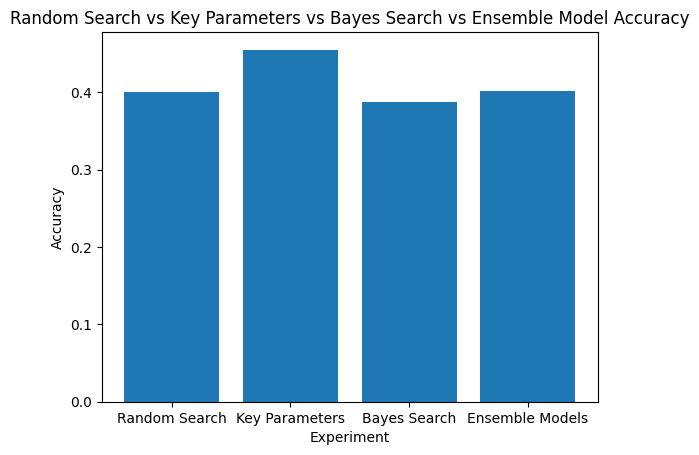

In [ ]:
import matplotlib.pyplot as plt

# Experiment results
search_accuracy = [random_search_accuracy, key_params_accuracy, best_accuracy, max(ensemble_scores)]
labels = ['Random Search', 'Key Parameters', 'Bayes Search', 'Ensemble Models']

# Plotting the results
plt.bar(labels, search_accuracy)
# plt.ylim(0.8, 1.0)  # Set the y-axis limits
plt.xlabel('Experiment')
plt.ylabel('Accuracy')
plt.title('Random Search vs Key Parameters vs Bayes Search vs Ensemble Model Accuracy')

# Displaying the graph
plt.show()


# Performance score of best Random Forest model upon Fourier Transform Dataset

In [ ]:
best_model1 = RandomForestClassifier(n_estimators=100, max_depth=None, max_features='sqrt')
best_model1.fit(X_train1, y_train1)
y_pred=best_model1.predict(X_test1)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Assuming you have true labels (y_test) and predicted labels (y_pred)

# Accuracy
accuracy = accuracy_score(y_test1, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test1, y_pred, average='macro')
print("Precision:", precision)

# Recall
recall = recall_score(y_test1, y_pred, average='macro')
print("Recall:", recall)

# F1-score
f1 = f1_score(y_test1, y_pred, average='macro')
print("F1-score:", f1)

Accuracy: 0.4097222222222222
Precision: 0.4429676690400445
Recall: 0.4030893478647113
F1-score: 0.3708368119095914


# Hyper-parameter tuning of Random Forest: Default model, Randomized Search CV & Key Parameters, Bayes Search CV, Ensemble Models upon Mel-Spectogram Dataset

data2

In [ ]:
# Start with default parameters
default_model = RandomForestClassifier()
default_model.fit(X_train2, y_train2)
default_accuracy = default_model.score(X_test2, y_test2)
print("Default model accuracy:", default_accuracy)

Default model accuracy: 0.5173611111111112


In [ ]:
default_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Use random search

random_search_model = RandomForestClassifier()
random_search = RandomizedSearchCV(random_search_model, param_distributions=param_dist, n_iter=10)
random_search.fit(X_train2, y_train2)
random_search_accuracy = random_search.best_score_
best_params = random_search.best_params_
print("Random search best accuracy:", random_search_accuracy)
print("Random search best parameters:", best_params)

# Focus on key parameters
key_params_model = RandomForestClassifier(n_estimators=100, max_depth=None, max_features='sqrt')
key_params_model.fit(X_train2, y_train2)
key_params_accuracy = key_params_model.score(X_test2, y_test2)
print("Key parameters model accuracy:", key_params_accuracy)

Random search best accuracy: 0.47564464520986255
Random search best parameters: {'max_depth': 12, 'max_features': 'log2', 'n_estimators': 97}
Key parameters model accuracy: 0.5347222222222222


In [ ]:
random_search

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15, 16,
                                                      17, 18, 19],
                                        'max_features': ['log2', 'sqrt'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ff620ce1540>})

In [ ]:
key_params_model

RandomForestClassifier()

In [ ]:
random_search_accuracy

0.47564464520986255

In [ ]:
key_params_accuracy

0.5347222222222222

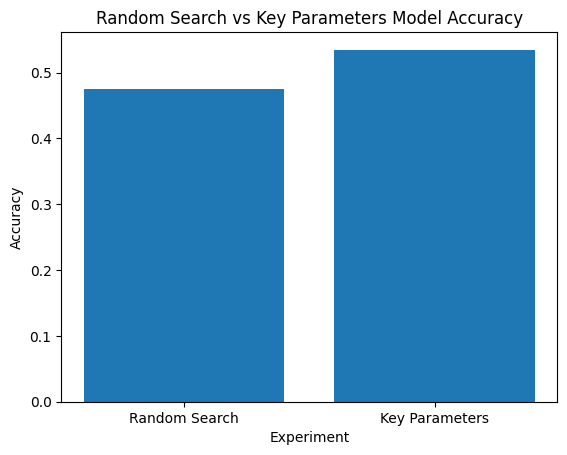

In [ ]:
import matplotlib.pyplot as plt

# Experiment results
search_accuracy = [random_search_accuracy, key_params_accuracy]
labels = ['Random Search', 'Key Parameters']

# Plotting the results
plt.bar(labels, search_accuracy)
# plt.ylim(0.8, 1.0)  # Set the y-axis limits
plt.xlabel('Experiment')
plt.ylabel('Accuracy')
plt.title('Random Search vs Key Parameters Model Accuracy')

# Displaying the graph
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV

# Load your data and split it into features (X2) and labels (y2)

# Define the parameter search space
param_space = {
    'n_estimators': (10, 100),
    'max_depth': (5, 20),
    'max_features': ['sqrt', 'log2'],
}

# Create a RandomForestClassifier model
model = RandomForestClassifier()

# Perform Bayesian optimization with cross-validation
bayes_search = BayesSearchCV(model, param_space, n_iter=10, cv=5)
bayes_search.fit(X2, y2)

# Get the best model and its accuracy
best_model = bayes_search.best_estimator_
best_accuracy = bayes_search.best_score_

print("Best accuracy:", best_accuracy)
print("Best parameters:", best_model.get_params())


Best accuracy: 0.40486111111111117
Best parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 17, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 44, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


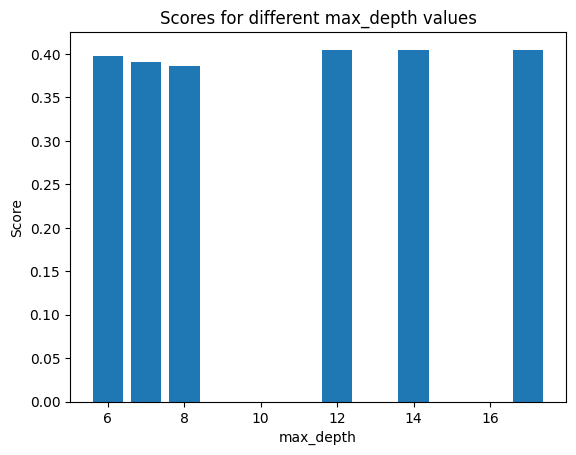

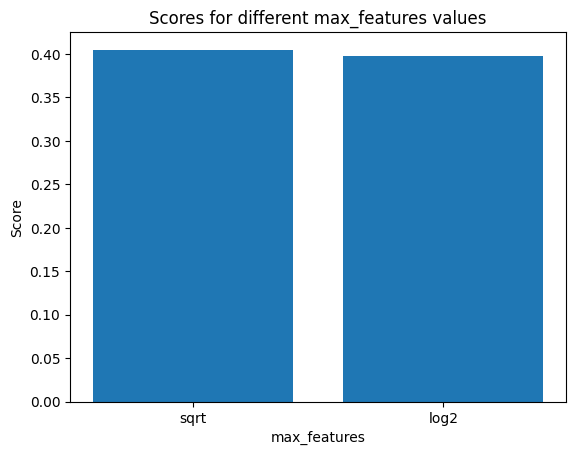

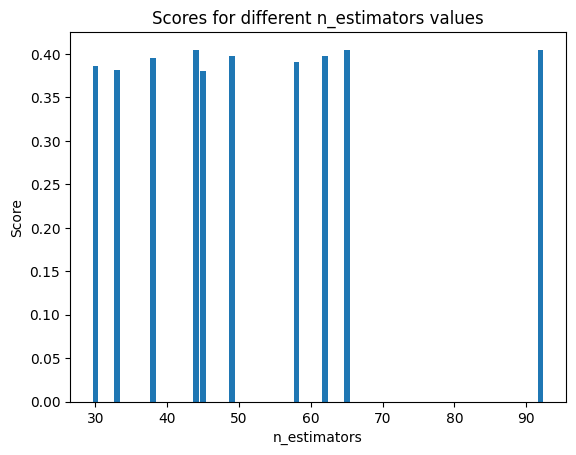

In [ ]:
# Get all scores and corresponding hyperparameters
all_scores = bayes_search.cv_results_['mean_test_score']
all_params = bayes_search.cv_results_['params']

# Extract hyperparameter values
n_estimators = [params['n_estimators'] for params in all_params]
max_depth = [params['max_depth'] for params in all_params]
max_features = [params['max_features'] for params in all_params]

# Plot for max_depth
plt.bar(max_depth, all_scores)
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Scores for different max_depth values')
plt.show()

# Plot for max_features
plt.bar(max_features, all_scores)
plt.xlabel('max_features')
plt.ylabel('Score')
plt.title('Scores for different max_features values')
plt.show()

# Plot for n_estimators
plt.bar(n_estimators, all_scores)
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.title('Scores for different n_estimators values')
plt.show()

In [ ]:
bayes_search

BayesSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=10,
              search_spaces={'max_depth': (5, 20),
                             'max_features': ['sqrt', 'log2'],
                             'n_estimators': (10, 100)})

In [ ]:
bayes_search.best_estimator_

RandomForestClassifier(max_depth=17, n_estimators=44)

In [ ]:
bayes_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 17,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 44,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Ensemble multiple models
ensemble_model_1 = RandomForestClassifier(n_estimators=100, max_depth=None, max_features='sqrt')
ensemble_model_2 = RandomForestClassifier(n_estimators=50, max_depth=10, max_features='sqrt')
ensemble_model_3 = RandomForestClassifier(n_estimators=150, max_depth=15, max_features='sqrt')

ensemble_models = [ensemble_model_1, ensemble_model_2, ensemble_model_3]
ensemble_scores = []

for model in ensemble_models:
    scores = cross_val_score(model, X2, y2, cv=5)
    ensemble_scores.append(scores.mean())

best_ensemble_model = ensemble_models[ensemble_scores.index(max(ensemble_scores))]

print("Best ensemble model accuracy:", max(ensemble_scores))

Best ensemble model accuracy: 0.40625


In [ ]:
ensemble_scores

[0.4041666666666667, 0.40625, 0.40625]

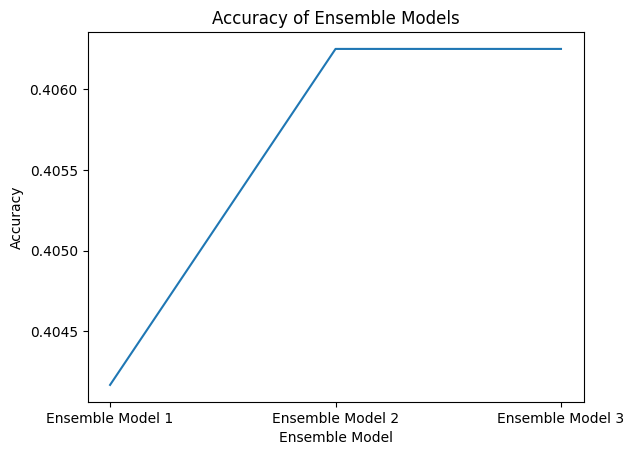

In [ ]:
# Create bar plots
ensemble_labels = ['Ensemble Model 1', 'Ensemble Model 2', 'Ensemble Model 3']

plt.plot(ensemble_labels, ensemble_scores)
plt.xlabel('Ensemble Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Ensemble Models')
# plt.ylim([0, 1])  # Set y-axis limit to ensure consistent scale
plt.show()

# Plotting the comparison bar plot upon Mel-Spectogram Dataset

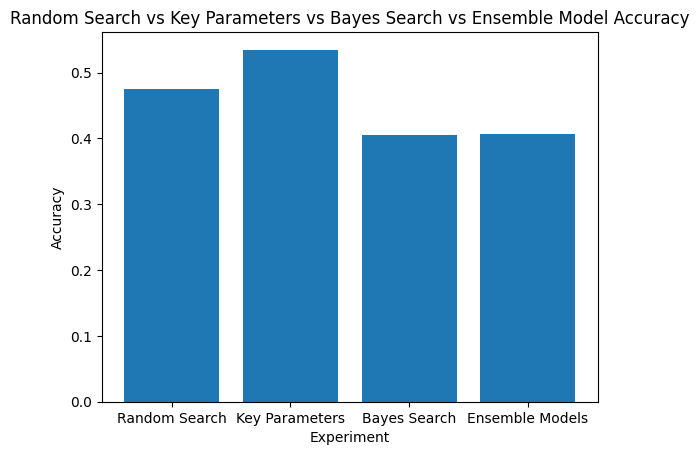

In [ ]:
import matplotlib.pyplot as plt

# Experiment results
search_accuracy = [random_search_accuracy, key_params_accuracy, best_accuracy, max(ensemble_scores)]
labels = ['Random Search', 'Key Parameters', 'Bayes Search', 'Ensemble Models']

# Plotting the results
plt.bar(labels, search_accuracy)
# plt.ylim(0.8, 1.0)  # Set the y-axis limits
plt.xlabel('Experiment')
plt.ylabel('Accuracy')
plt.title('Random Search vs Key Parameters vs Bayes Search vs Ensemble Model Accuracy')

# Displaying the graph
plt.show()


# Performance score of best Random Forest model upon Mel-Spectogram Dataset

In [ ]:
best_model2 = RandomForestClassifier(n_estimators=100, max_depth=None, max_features='sqrt')
best_model2.fit(X_train2, y_train2)
y_pred=best_model2.predict(X_test2)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have true labels (y_test) and predicted labels (y_pred)

# Accuracy
accuracy = accuracy_score(y_test2, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test2, y_pred, average='macro')
print("Precision:", precision)

# Recall
recall = recall_score(y_test2, y_pred, average='macro')
print("Recall:", recall)

# F1-score
f1 = f1_score(y_test2, y_pred, average='macro')
print("F1-score:", f1)

Accuracy: 0.4583333333333333
Precision: 0.4363988095238095
Recall: 0.43790307992435656
F1-score: 0.4322762932577511


#Apply LDA and PCA to the Fourier Transform Dataset

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/PRML_Major_Project/audio_fft_dataset.csv")

In [ ]:
pca = PCA(n_components = 500)
lda = LDA(n_components = 7)

In [ ]:
Y = dataset["Emotion"]
X = dataset.iloc[:,7:]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pca = pca.fit(X)
lda = lda.fit(X,Y)
X_pca = pca.transform(X)
X_lda = lda.transform(X)
X_pca = torch.tensor(X_pca)
X_lda = torch.tensor(X_lda)
Y = torch.tensor(Y.values - 1)

In [ ]:
dataset_pca = TensorDataset(X_pca,Y)
dataset_lda = TensorDataset(X_lda,Y)


In [ ]:
len(Y)

1440

In [ ]:
train_pca,test_pca,valid_pca = random_split(dataset_pca,[864,288,288])
train_lda,test_lda,valid_lda = random_split(dataset_lda,[864,288,288])


In [ ]:
train_pca_dl = DataLoader(dataset = train_pca,batch_size = 64)
test_pca_dl = DataLoader(dataset = test_pca)
valid_pca_dl = DataLoader(dataset = valid_pca)
train_lda_dl = DataLoader(dataset = train_lda,batch_size = 64)
test_lda_dl = DataLoader(dataset = test_lda)
valid_lda_dl = DataLoader(dataset = valid_lda)

# Apply ANN upon both LDA and PCA transformed datasets.

In [ ]:
class model_pca_tanh(nn.Module):
  def __init__(self,input_size,num_classes):
    super(model_pca_tanh,self).__init__()
    self.hid_lay1 = nn.Linear(input_size,500)
    self.act_fn1 = nn.Tanh()
    self.hid_lay2 = nn.Linear(500,300)
    self.act_fn2 = nn.Tanh()
    self.hid_lay3 = nn.Linear(300,8)
    self.act_fn3 = nn.Tanh()
    self.output_layer = nn.Softmax()
  
  def forward(self,x):
    x = self.hid_lay1(x)
    x = self.act_fn1(x)
    x = self.hid_lay2(x)
    x = self.act_fn2(x)
    x = self.hid_lay3(x)
    x = self.act_fn3(x)
    x = self.output_layer(x)
    return x
    

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
model = model_pca_tanh(500,8).to(device)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(model.parameters(),lr = 0.0001)

In [ ]:
best_acc = 0.0

In [ ]:
for epoch in range(1000):

    running_loss = 0.0
    acc = 0.0
    j = 0
    for i, data in enumerate(train_pca):
        inputs, labels = data
        inputs = inputs.to(device = device).float()
        labels = labels.to(device = device)
        opt.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        running_loss += loss.item()
        _,pred = torch.max(outputs,0)
        pred = pred.cpu().numpy()
        labels = labels.cpu().numpy()
        acc += np.sum(pred == labels)
        j += 1
    if epoch % 25 == 24:
        print(f'[{epoch + 1}] Training : loss: {running_loss:0.2f} accuracy : {acc/j}',end='')
    with torch.no_grad():
      acc = 0.0
      j = 0
      running_loss = 0.0
      for i, data in enumerate(valid_pca):
        inputs, labels = data
        inputs = inputs.to(device = device).float()
        labels = labels.to(device = device)
        opt.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        running_loss += loss.item()
        _,pred = torch.max(outputs,0)
        pred = pred.cpu().numpy()
        labels = labels.cpu().numpy()
        acc += np.sum(pred == labels)
        j += 1
      if best_acc < acc/j:
        torch.save(model,'/content/drive/MyDrive/PRML_Major_Project/model_pca_tanh.pth')
        best_acc = acc/j
    if epoch % 25 == 24:
        print(f' Validation :  loss: {running_loss:0.2f} accuracy : {acc/j}')
print('Finished Training')

<ipython-input-12-80f0222f38dc>:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.output_layer(x)


[25] Training : loss: 1495.32 accuracy : 0.9421296296296297 Validation :  loss: 583.23 accuracy : 0.2743055555555556
[50] Training : loss: 1483.97 accuracy : 0.9675925925925926 Validation :  loss: 584.52 accuracy : 0.2777777777777778
[75] Training : loss: 1479.51 accuracy : 0.9768518518518519 Validation :  loss: 583.92 accuracy : 0.2916666666666667
[100] Training : loss: 1479.90 accuracy : 0.9756944444444444 Validation :  loss: 584.58 accuracy : 0.2604166666666667
[125] Training : loss: 1478.04 accuracy : 0.9826388888888888 Validation :  loss: 584.27 accuracy : 0.2673611111111111
[150] Training : loss: 1477.00 accuracy : 0.9837962962962963 Validation :  loss: 585.20 accuracy : 0.2604166666666667
[175] Training : loss: 1476.77 accuracy : 0.9849537037037037 Validation :  loss: 584.27 accuracy : 0.2638888888888889
[200] Training : loss: 1476.54 accuracy : 0.9837962962962963 Validation :  loss: 584.79 accuracy : 0.2569444444444444
[225] Training : loss: 1477.57 accuracy : 0.982638888888888

In [ ]:
model =torch.load('/content/drive/MyDrive/PRML_Major_Project/model_pca_tanh.pth')

In [ ]:
with torch.no_grad():
    acc = 0.0
    j = 0
    for i, data in enumerate(test_pca):
        inputs, labels = data
        inputs = inputs.to(device = device).float()
        opt.zero_grad()
        outputs = model(inputs)
        _,pred = torch.max(outputs,0)
        pred = pred.cpu().numpy()
        labels = labels.numpy()
        acc += np.sum(pred == labels)
        j += 1
print(f"accuracy : {acc/j}")

<ipython-input-12-80f0222f38dc>:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.output_layer(x)


accuracy : 0.3194444444444444


In [ ]:
model = model_pca_tanh(7,8).to(device)

In [ ]:

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(model.parameters(),lr = 0.0001)

In [ ]:
best_acc = 0.0

In [ ]:
for epoch in range(1000):

    running_loss = 0.0
    acc = 0.0
    j = 0
    for i, data in enumerate(train_lda):
        inputs, labels = data
        inputs = inputs.to(device = device).float()
        labels = labels.to(device = device)
        opt.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        running_loss += loss.item()
        _,pred = torch.max(outputs,0)
        pred = pred.cpu().numpy()
        labels = labels.cpu().numpy()
        acc += np.sum(pred == labels)
        j += 1
    if epoch % 25 == 24:
        print(f'[{epoch + 1}] Training : loss: {running_loss:0.2f} accuracy : {acc/j}',end='')
    with torch.no_grad():
      acc = 0.0
      j = 0
      running_loss = 0.0
      for i, data in enumerate(valid_lda):
        inputs, labels = data
        inputs = inputs.to(device = device).float()
        labels = labels.to(device = device)
        opt.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        running_loss += loss.item()
        _,pred = torch.max(outputs,0)
        pred = pred.cpu().numpy()
        labels = labels.cpu().numpy()
        acc += np.sum(pred == labels)
        j += 1
      if best_acc < acc/j:
        torch.save(model,'/content/drive/MyDrive/PRML_Major_Project/model_lda_tanh.pth')
        best_acc = acc/j
    if epoch % 25 == 24:
        print(f' Validation :  loss: {running_loss:0.2f} accuracy : {acc/j}')
print('Finished Training')

<ipython-input-12-80f0222f38dc>:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.output_layer(x)


[25] Training : loss: 1482.43 accuracy : 0.9675925925925926 Validation :  loss: 494.96 accuracy : 0.9722222222222222
[50] Training : loss: 1481.57 accuracy : 0.96875 Validation :  loss: 494.96 accuracy : 0.9722222222222222
[75] Training : loss: 1481.37 accuracy : 0.96875 Validation :  loss: 495.65 accuracy : 0.9722222222222222
[100] Training : loss: 1481.37 accuracy : 0.96875 Validation :  loss: 495.46 accuracy : 0.96875
[125] Training : loss: 1481.37 accuracy : 0.9710648148148148 Validation :  loss: 495.48 accuracy : 0.96875
[150] Training : loss: 1481.37 accuracy : 0.9722222222222222 Validation :  loss: 495.52 accuracy : 0.96875
[175] Training : loss: 1481.37 accuracy : 0.9733796296296297 Validation :  loss: 495.55 accuracy : 0.96875
[200] Training : loss: 1481.37 accuracy : 0.9733796296296297 Validation :  loss: 495.55 accuracy : 0.96875
[225] Training : loss: 1481.37 accuracy : 0.9733796296296297 Validation :  loss: 495.56 accuracy : 0.96875
[250] Training : loss: 1481.37 accuracy 

In [ ]:
model =torch.load('/content/drive/MyDrive/PRML_Major_Project/model_lda_tanh.pth')

In [ ]:
with torch.no_grad():
    acc = 0.0
    j = 0
    for i, data in enumerate(test_lda):
        inputs, labels = data
        inputs = inputs.to(device = device).float()
        opt.zero_grad()
        outputs = model(inputs)
        _,pred = torch.max(outputs,0)
        pred = pred.cpu().numpy()
        labels = labels.numpy()
        acc += np.sum(pred == labels)
        j += 1
print(f"accuracy : {acc/j}")

accuracy : 0.9409722222222222


<ipython-input-12-80f0222f38dc>:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.output_layer(x)


# Apply LDA and PCA to the Mel-Spectogram Dataset

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/PRML_Major_Project/audio_mel_dataset.csv")

In [ ]:
pca = PCA(n_components = 500)
lda = LDA(n_components = 7)

In [ ]:
Y = dataset["Emotion"]
X = dataset.iloc[:,7:]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pca = pca.fit(X)
lda = lda.fit(X,Y)
X_pca = pca.transform(X)
X_lda = lda.transform(X)
X_pca = torch.tensor(X_pca)
X_lda = torch.tensor(X_lda)
Y = torch.tensor(Y.values - 1)

In [ ]:
dataset_pca = TensorDataset(X_pca,Y)
dataset_lda = TensorDataset(X_lda,Y)


In [ ]:
len(Y)

1440

In [ ]:
train_pca,test_pca,valid_pca = random_split(dataset_pca,[864,288,288])
train_lda,test_lda,valid_lda = random_split(dataset_lda,[864,288,288])


In [ ]:
train_pca_dl = DataLoader(dataset = train_pca,batch_size = 64)
test_pca_dl = DataLoader(dataset = test_pca)
valid_pca_dl = DataLoader(dataset = valid_pca)
train_lda_dl = DataLoader(dataset = train_lda,batch_size = 64)
test_lda_dl = DataLoader(dataset = test_lda)
valid_lda_dl = DataLoader(dataset = valid_lda)

# Apply ANN upon both LDA and PCA transformed datasets.

In [ ]:
class model_pca_tanh(nn.Module):
  def __init__(self,input_size,num_classes):
    super(model_pca_tanh,self).__init__()
    self.hid_lay1 = nn.Linear(input_size,500)
    self.act_fn1 = nn.Tanh()
    self.hid_lay2 = nn.Linear(500,300)
    self.act_fn2 = nn.Tanh()
    self.hid_lay3 = nn.Linear(300,8)
    self.act_fn3 = nn.Tanh()
    self.output_layer = nn.Softmax()
  
  def forward(self,x):
    x = self.hid_lay1(x)
    x = self.act_fn1(x)
    x = self.hid_lay2(x)
    x = self.act_fn2(x)
    x = self.hid_lay3(x)
    x = self.act_fn3(x)
    x = self.output_layer(x)
    return x
    

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

In [ ]:
model = model_pca_tanh(500,8).to(device)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(model.parameters(),lr = 0.0001)

In [ ]:
best_acc = 0.0

In [ ]:
for epoch in range(1000):

    running_loss = 0.0
    acc = 0.0
    j = 0
    for i, data in enumerate(train_pca):
        inputs, labels = data
        inputs = inputs.to(device = device).float()
        labels = labels.to(device = device)
        opt.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        running_loss += loss.item()
        _,pred = torch.max(outputs,0)
        pred = pred.cpu().numpy()
        labels = labels.cpu().numpy()
        acc += np.sum(pred == labels)
        j += 1
    if epoch % 25 == 24:
        print(f'[{epoch + 1}] Training : loss: {running_loss:0.2f} accuracy : {acc/j}',end='')
    with torch.no_grad():
      acc = 0.0
      j = 0
      running_loss = 0.0
      for i, data in enumerate(valid_pca):
        inputs, labels = data
        inputs = inputs.to(device = device).float()
        labels = labels.to(device = device)
        opt.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        running_loss += loss.item()
        _,pred = torch.max(outputs,0)
        pred = pred.cpu().numpy()
        labels = labels.cpu().numpy()
        acc += np.sum(pred == labels)
        j += 1
      if best_acc < acc/j:
        torch.save(model,'/content/drive/MyDrive/PRML_Major_Project/model2_pca_tanh.pth')
        best_acc = acc/j
    if epoch % 25 == 24:
        print(f' Validation :  loss: {running_loss:0.2f} accuracy : {acc/j}')
print('Finished Training')

<ipython-input-35-80f0222f38dc>:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.output_layer(x)


[25] Training : loss: 1587.15 accuracy : 0.6828703703703703 Validation :  loss: 582.85 accuracy : 0.2708333333333333
[50] Training : loss: 1561.13 accuracy : 0.7615740740740741 Validation :  loss: 582.46 accuracy : 0.2743055555555556
[75] Training : loss: 1548.11 accuracy : 0.7893518518518519 Validation :  loss: 581.25 accuracy : 0.2847222222222222
[100] Training : loss: 1544.66 accuracy : 0.8020833333333334 Validation :  loss: 583.27 accuracy : 0.23958333333333334
[125] Training : loss: 1540.51 accuracy : 0.8159722222222222 Validation :  loss: 579.59 accuracy : 0.2951388888888889
[150] Training : loss: 1540.95 accuracy : 0.8067129629629629 Validation :  loss: 579.06 accuracy : 0.2951388888888889
[175] Training : loss: 1536.96 accuracy : 0.8240740740740741 Validation :  loss: 579.07 accuracy : 0.2916666666666667
[200] Training : loss: 1534.74 accuracy : 0.8252314814814815 Validation :  loss: 581.49 accuracy : 0.2916666666666667
[225] Training : loss: 1532.09 accuracy : 0.83333333333333

In [ ]:
model =torch.load('/content/drive/MyDrive/PRML_Major_Project/model2_pca_tanh.pth')

In [ ]:
with torch.no_grad():
    acc = 0.0
    j = 0
    for i, data in enumerate(test_pca):
        inputs, labels = data
        inputs = inputs.to(device = device).float()
        opt.zero_grad()
        outputs = model(inputs)
        _,pred = torch.max(outputs,0)
        pred = pred.cpu().numpy()
        labels = labels.numpy()
        acc += np.sum(pred == labels)
        j += 1
print(f"accuracy : {acc/j}")

accuracy : 0.2326388888888889


<ipython-input-35-80f0222f38dc>:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.output_layer(x)


In [ ]:
model = model_pca_tanh(7,8).to(device)

In [ ]:

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(model.parameters(),lr = 0.0001)

In [ ]:
best_acc = 0.0

In [ ]:
for epoch in range(1000):

    running_loss = 0.0
    acc = 0.0
    j = 0
    for i, data in enumerate(train_lda):
        inputs, labels = data
        inputs = inputs.to(device = device).float()
        labels = labels.to(device = device)
        opt.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        running_loss += loss.item()
        _,pred = torch.max(outputs,0)
        pred = pred.cpu().numpy()
        labels = labels.cpu().numpy()
        acc += np.sum(pred == labels)
        j += 1
    if epoch % 25 == 24:
        print(f'[{epoch + 1}] Training : loss: {running_loss:0.2f} accuracy : {acc/j}',end='')
    with torch.no_grad():
      acc = 0.0
      j = 0
      running_loss = 0.0
      for i, data in enumerate(valid_lda):
        inputs, labels = data
        inputs = inputs.to(device = device).float()
        labels = labels.to(device = device)
        opt.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        running_loss += loss.item()
        _,pred = torch.max(outputs,0)
        pred = pred.cpu().numpy()
        labels = labels.cpu().numpy()
        acc += np.sum(pred == labels)
        j += 1
      if best_acc < acc/j:
        torch.save(model,'/content/drive/MyDrive/PRML_Major_Project/model2_lda_tanh.pth')
        best_acc = acc/j
    if epoch % 25 == 24:
        print(f' Validation :  loss: {running_loss:0.2f} accuracy : {acc/j}')
print('Finished Training')

<ipython-input-35-80f0222f38dc>:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.output_layer(x)


[25] Training : loss: 1473.15 accuracy : 0.9942129629629629 Validation :  loss: 491.82 accuracy : 0.9895833333333334
[50] Training : loss: 1472.90 accuracy : 0.9953703703703703 Validation :  loss: 491.86 accuracy : 0.9895833333333334
[75] Training : loss: 1472.86 accuracy : 0.9953703703703703 Validation :  loss: 491.80 accuracy : 0.9895833333333334
[100] Training : loss: 1472.86 accuracy : 0.9953703703703703 Validation :  loss: 491.94 accuracy : 0.9895833333333334
[125] Training : loss: 1472.86 accuracy : 0.9965277777777778 Validation :  loss: 491.97 accuracy : 0.9895833333333334
[150] Training : loss: 1472.86 accuracy : 0.9965277777777778 Validation :  loss: 491.96 accuracy : 0.9895833333333334
[175] Training : loss: 1472.86 accuracy : 0.9965277777777778 Validation :  loss: 491.97 accuracy : 0.9895833333333334
[200] Training : loss: 1472.86 accuracy : 0.9965277777777778 Validation :  loss: 491.97 accuracy : 0.9895833333333334
[225] Training : loss: 1472.86 accuracy : 0.996527777777777

In [ ]:
model =torch.load('/content/drive/MyDrive/PRML_Major_Project/model2_lda_tanh.pth')

In [ ]:
with torch.no_grad():
    acc = 0.0
    j = 0
    for i, data in enumerate(test_lda):
        inputs, labels = data
        inputs = inputs.to(device = device).float()
        opt.zero_grad()
        outputs = model(inputs)
        _,pred = torch.max(outputs,0)
        pred = pred.cpu().numpy()
        labels = labels.numpy()
        acc += np.sum(pred == labels)
        j += 1
print(f"accuracy : {acc/j}")

accuracy : 0.9895833333333334


<ipython-input-35-80f0222f38dc>:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.output_layer(x)
